# Tarea 06: Serie de Taylor y Polinomios de Lagrange
### CONJUNTO DE EJERCICIOS

- Mateo Molina Moises Estrella

**Link Repositorio:** https://github.com/R3LM15/MetodosNumericos_MateoMolina




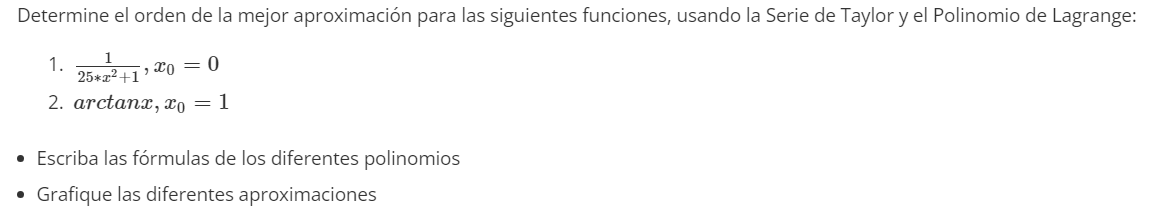

- ### Serie de Taylor
    1. 
    
    $$ P_n(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n $$

    Orden 6

    $x_0=0$

    $f(x)=\frac{1}{25*x^{2}+1}$ -> 1

    $f'(x)=-\frac{50x}{\left(25x^2+1\right)^2}$ -> 0

    $f''(x)=-\frac{50\left(1-75x^2\right)}{\left(25x^2+1\right)^3}$ -> -50

    $f'''(x)=\frac{15000x\left(-25x^2+1\right)}{\left(25x^2+1\right)^4}$ -> 0
    
    $f^{4}(x)= \frac{15000\left(3125x^4-250x^2+1\right)}{\left(25x^2+1\right)^5} $ -> 15000 

    $f^{5}(x)= \frac{3750000x\left(-1875x^4+250x^2-3\right)}{\left(25x^2+1\right)^6}$  -> 0

    $f^{6}(x)= \frac{11250000\left(109375x^6-21875x^4+525x^2-1\right)}{\left(25x^2+1\right)^7}$ -> -11250000


$$ P_6(x) = 1 +\frac{ - 50}{2!}(x)^2 + \frac{-11250000}{6!}(x)^6  $$

$$ P_6(x) = 1 - 25x^2 + 625x^4 -15625x^6 $$

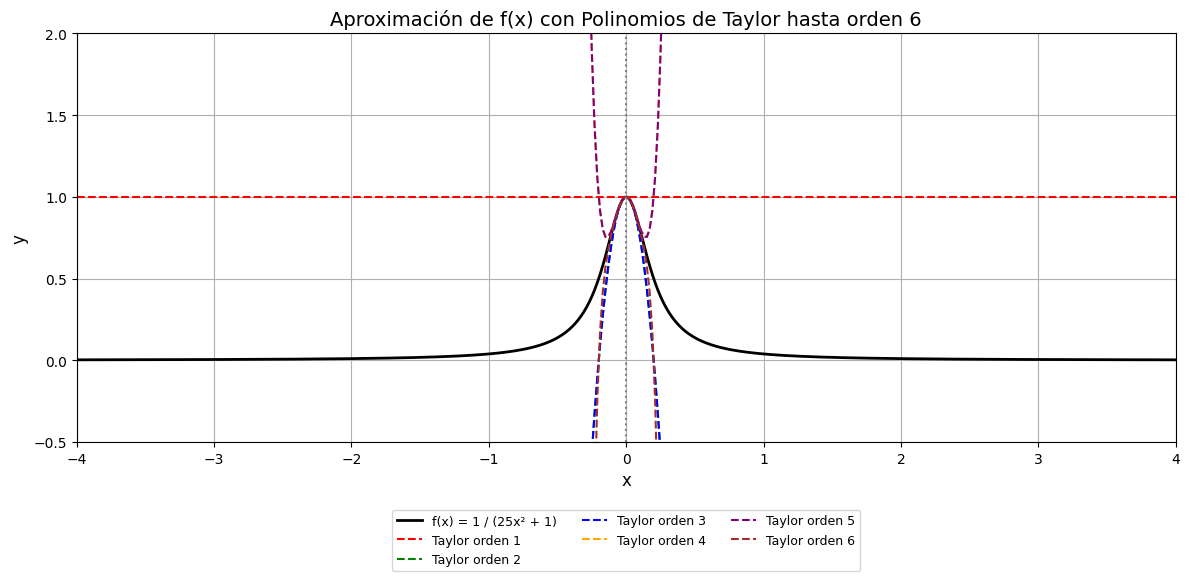

In [30]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
x = sp.Symbol('x')
f = 1 / (25 * x**2 + 1)
x0 = 0
orden_max = 6

# Función real
f_real = sp.lambdify(x, f, modules=['numpy'])
x_vals = np.linspace(-4, 4, 400)
y_real = f_real(x_vals)

# Colores estáticos para evitar problemas
color_list = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'gray', 'olive']

# Inicializar la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_real, label='f(x) = 1 / (25x² + 1)', color='black', linewidth=2)

# Dibujar los polinomios de Taylor
for orden in range(1, orden_max + 1):
    taylor_series = f.series(x, x0, orden + 1).removeO()
    f_taylor = sp.lambdify(x, taylor_series, modules=['numpy'])

    try:
        y_taylor = f_taylor(x_vals)
        if np.isscalar(y_taylor):
            y_taylor = np.full_like(x_vals, y_taylor)  # convertir a array
    except Exception as e:
        print(f"Error al evaluar el orden {orden}: {e}")
        continue

    color = color_list[(orden - 1) % len(color_list)]
    plt.plot(x_vals, y_taylor, linestyle='--', linewidth=1.5, color=color, label=f'Taylor orden {orden}')

# Decoración
plt.axvline(x=x0, color='gray', linestyle=':')
plt.ylim(-0.5, 2)
plt.xlim(-4, 4)
plt.title(f'Aproximación de f(x) con Polinomios de Taylor hasta orden {orden_max}', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


2. 

$$ P_n(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n $$

Orden 6

$x_0=1$

$f(x)=\arctan (x)$ -> $ \frac{\pi}{4} \approx 0.7854 $

$f'(x)= \frac{1}{x^2+1} $ -> 0.5

$f''(x)=-\frac{2x}{\left(x^2+1\right)^2}$ -> -0.5

$f'''(x)= -\frac{2\left(-3x^2+1\right)}{\left(x^2+1\right)^3} $ -> 0.5
    
$f^{4}(x)= \frac{24x\left(-x^2+1\right)}{\left(x^2+1\right)^4}$ -> 0 

$f^{5}(x)= \frac{24\left(5x^4-10x^2+1\right)}{\left(x^2+1\right)^5}$  -> -3



$$ P_n(x) = 0.7854 + \frac{1}{2}(x - 1) - \frac{1}{2} \cdot \frac{1}{2!}(x - 1)^2 +\frac{1}{2} \cdot \frac{1}{3!}(x - 1)^3 - \frac{3}{5!}(x - 1)^5  $$

$$ P_6(x) = 0.7854+\frac{x-1}{2}-\frac{\left(x-1\right)^2}{4}+\frac{\left(x-1\right)^3}{12}-\frac{\left(x-1\right)^5}{40}$$


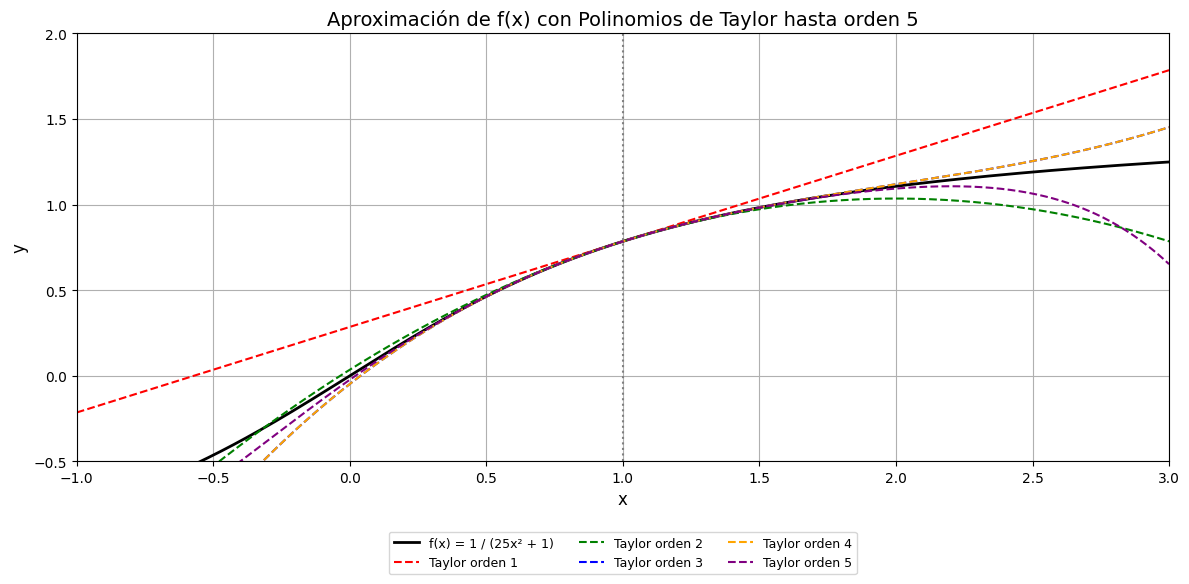

In [40]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
x = sp.Symbol('x')
f = sp.atan(x) 
x0 = 1
orden_max = 5

# Función real
f_real = sp.lambdify(x, f, modules=['numpy'])
x_vals = np.linspace(-1, 3, 600)
y_real = f_real(x_vals)

# Colores estáticos para evitar problemas
color_list = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'gray', 'olive']

# Inicializar la gráfica
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_real, label='f(x) = 1 / (25x² + 1)', color='black', linewidth=2)

# Dibujar los polinomios de Taylor
for orden in range(1, orden_max + 1):
    taylor_series = f.series(x, x0, orden + 1).removeO()
    f_taylor = sp.lambdify(x, taylor_series, modules=['numpy'])

    try:
        y_taylor = f_taylor(x_vals)
        if np.isscalar(y_taylor):
            y_taylor = np.full_like(x_vals, y_taylor)  # convertir a array
    except Exception as e:
        print(f"Error al evaluar el orden {orden}: {e}")
        continue

    color = color_list[(orden - 1) % len(color_list)]
    plt.plot(x_vals, y_taylor, linestyle='--', linewidth=1.5, color=color, label=f'Taylor orden {orden}')

# Decoración
plt.axvline(x=x0, color='gray', linestyle=':')
plt.ylim(-0.5, 2)
plt.xlim(-1, 3)
plt.title(f'Aproximación de f(x) con Polinomios de Taylor hasta orden {orden_max}', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

- ### Serie de Lagrange

Siento $ x_o = 0 , x_1=1,x_2=2,x_3=3 $ , sea 4 puntos  n =3


$L_0(x) = \frac{x-1}{0-1} \cdot \frac{x-2}{0-2} \cdot \frac{x-3}{0-3} = \frac{x-1}{-1} \cdot \frac{x-2}{-2} \cdot \frac{x-3}{-3} $ 

$L_1(x) = \frac{x-0}{1-0} \cdot \frac{x-2}{1-2} \cdot \frac{x-3}{1-3} = x \cdot \frac{x-2}{-1} \cdot \frac{x-3}{-2}$

$L_2(x) = \frac{x-0}{2-0} \cdot \frac{x-1}{2-1} \cdot \frac{x-3}{2-3} = \frac{x}{2} \cdot (x-1) \cdot \frac{x-3}{-1} $

$L_3(x) = \frac{x-0}{3-0} \cdot \frac{x-1}{3-1} \cdot \frac{x-2}{3-2} = \frac{x}{3} \cdot \frac{x-1}{2} \cdot (x-2)$


 

$f(0) = 1$

$f(1) = \frac{1}{26}  $

$f(2) = \frac{1}{101}  $

$f(3) = \frac{1}{226}  $


$$P_3(x) = 1 \cdot \frac{x-1}{-1} \cdot \frac{x-2}{-2} \cdot \frac{x-3}{-3}  + \frac{1}{26} \cdot x \cdot \frac{x-2}{-1} \cdot \frac{x-3}{-2} + \frac{1}{101} \cdot \frac{x}{2} \cdot (x-1) \cdot \frac{x-3}{-1}  + \frac{1}{226}  \cdot \frac{x}{3} \cdot \frac{x-1}{2} \cdot (x-2)$$

$$P_3(x) = \frac{\left(-x+1\right)\left(x-2\right)\left(x-3\right)}{6}-\frac{x\left(-x+2\right)\left(x-3\right)}{52}+\frac{x\left(x-1\right)\left(-x+3\right)}{202}+\frac{x\left(x-1\right)\left(x-2\right)}{1356}$$


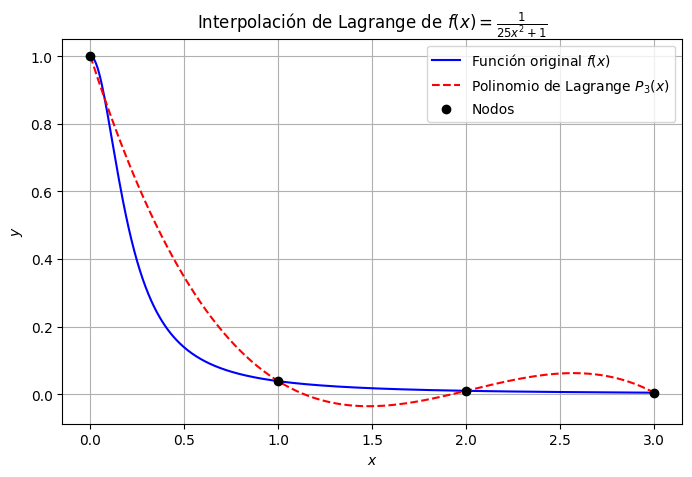

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return 1 / (25 * x**2 + 1)

# Nodos (4 puntos equiespaciados entre 0 y 3)
x_nodes = np.array([0, 1, 2, 3])
y_nodes = f(x_nodes)

# Polinomio base de Lagrange L_i(x)
def L(i, x):
    xi = x_nodes[i]
    terms = [(x - x_nodes[j]) / (xi - x_nodes[j]) for j in range(len(x_nodes)) if j != i]
    result = 1
    for term in terms:
        result *= term
    return result

# Polinomio interpolador de Lagrange P(x)
def P(x):
    return sum(y_nodes[i] * L(i, x) for i in range(len(x_nodes)))

# Puntos para graficar función y polinomio interpolador
x_plot = np.linspace(0, 3, 400)
y_plot_f = f(x_plot)
y_plot_P = np.array([P(xi) for xi in x_plot])

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot_f, label='Función original $f(x)$', color='blue')
plt.plot(x_plot, y_plot_P, label='Polinomio de Lagrange $P_3(x)$', linestyle='--', color='red')
plt.scatter(x_nodes, y_nodes, color='black', zorder=5, label='Nodos')
plt.title('Interpolación de Lagrange de $f(x)=\\frac{1}{25x^2+1}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()


Dado los puntos 0, 1, 2

$f(x) = \arctan(0) = 0$

$f(1) = \arctan(1) = \frac{\pi}{4} \approx 0.7854$

$f(2)= \arctan(2) \approx 1.1071$

$L_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 1)(x - 2)}{(0 - 1)(0 - 2)} = \frac{(x-1)(x-2)}{(-1)(-2)} = \frac{(x-1)(x-2)}{2}$

$L_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x - 0)(x - 2)}{(1 - 0)(1 - 2)} = \frac{x(x-2)}{1 \cdot (-1)} = -x(x-2)$

$L_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x - 0)(x - 1)}{(2 - 0)(2 - 1)} = \frac{x(x-1)}{2 \cdot 1} = \frac{x(x-1)}{2}$



$$P_2(x) = -0.7854 x(x-2)+ 1.1071\frac{x(x-1)}{2}$$

$$P_2(x) = 1.01725x -0.23185 x^{2}$$



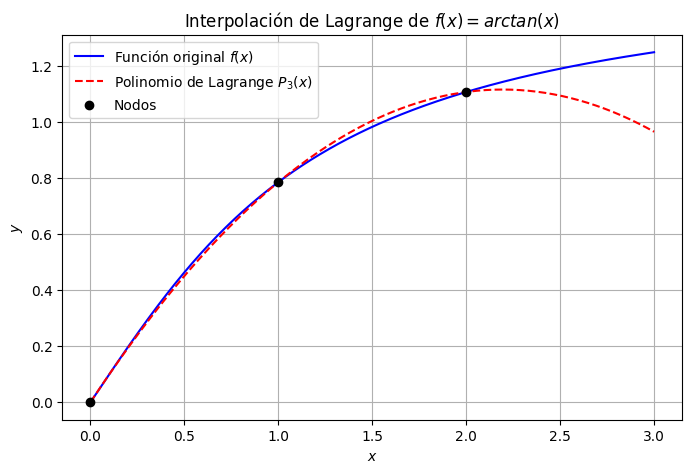

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.arctan(x)

# Nodos (4 puntos equiespaciados entre 0 y 3)
x_nodes = np.array([0, 1, 2])
y_nodes = f(x_nodes)

# Polinomio base de Lagrange L_i(x)
def L(i, x):
    xi = x_nodes[i]
    terms = [(x - x_nodes[j]) / (xi - x_nodes[j]) for j in range(len(x_nodes)) if j != i]
    result = 1
    for term in terms:
        result *= term
    return result

# Polinomio interpolador de Lagrange P(x)
def P(x):
    return sum(y_nodes[i] * L(i, x) for i in range(len(x_nodes)))

# Puntos para graficar función y polinomio interpolador
x_plot = np.linspace(0, 3, 400)
y_plot_f = f(x_plot)
y_plot_P = np.array([P(xi) for xi in x_plot])

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot_f, label='Función original $f(x)$', color='blue')
plt.plot(x_plot, y_plot_P, label='Polinomio de Lagrange $P_3(x)$', linestyle='--', color='red')
plt.scatter(x_nodes, y_nodes, color='black', zorder=5, label='Nodos')
plt.title('Interpolación de Lagrange de $f(x)=arctan(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()